In [ ]:
#工薪贷首逾模型offset 数据集  +加上  电商，芝麻，腾讯分，阿福，魔杖 数据     

In [2]:
from impala.dbapi import connect
#import pymysql
from sqlalchemy import create_engine
import pandas as pd
import sys
conn_hive = connect(host='192.168.19.195',database='ldrpt',port=10000,auth_mechanism='PLAIN')
data=pd.read_sql("select * from xffq_user_sampl_20190227",conn_hive)
youmeng_data=pd.read_sql("select b.* from xffq_user_sampl_20190227 a  inner join youmeng_all_feature b on a.client_no=b.client_no ",conn_hive)  #设备数据               
suolun_data=pd.read_sql("select b.* from xffq_user_sampl_20190227 a  inner join suolun_all_feature b on a.client_no=b.client_no ",conn_hive)                
tongdun_data=pd.read_sql("select b.* from xffq_user_sampl_20190227 a  inner join tongdun_all_feature b on a.client_no=b.client_no ",conn_hive)  
xinyan_data=pd.read_sql("select b.* from xffq_user_sampl_20190227 a  inner join  xinyan_all_feature b on a.cert_no=b.id_no",conn_hive)
yy_data=pd.read_sql("select b.* from xffq_user_sampl_20190227 a inner join yy_all_feature b on a.client_no=b.client_no",conn_hive) #盈盈内部整合的特征字段
afu_data=pd.read_sql("select b.* from xffq_user_sampl_20190227 a inner join afu_all_feature b on a.client_no=b.client_no",conn_hive)
gxb_data=pd.read_sql("select b.* from xffq_user_sampl_20190227 a inner join gxb_all_feature b on a.client_no=b.client_no",conn_hive) #电商数据
magicwand_data=pd.read_sql("select b.* from xffq_user_sampl_20190227 a inner join magicwand_all_feature b on a.client_no=b.client_no",conn_hive)
moxie_data=pd.read_sql("select b.* from xffq_user_sampl_20190227 a inner join moxie_carrier_all_feature b on a.client_no=b.client_no",conn_hive) #运行商数据


DatabaseError: Execution failed on sql: select b.* from xffq_user_sampl_20190227 a inner join yy_all_feature b on a.clinet_no=b.client_no
Error while compiling statement: FAILED: SemanticException [Error 10002]: Line 1:76 Invalid column reference 'clinet_no'
unable to rollback

In [ ]:
data.to_csv('data.csv')

In [5]:
mm=['yy_data','afu_data','gxb_data','magicwand_data','suolun_data','tongdun_data','xinyan_data','youmeng_data','moxie_data','data']
k=0
for item in [yy_data,afu_data,gxb_data,magicwand_data,suolun_data,tongdun_data,xinyan_data,youmeng_data,moxie_data,data]:
    item.to_csv(mm[k]+'.csv')
    k+=1
    print(k,len(item))


1 184419
2 68416
3 180271
4 99296
5 181904
6 181552
7 138497
8 189808
9 178905
10 184468


In [ ]:
#############样本处理#####################

In [118]:
#读取数据
import datetime
import pandas as pd
data=pd.read_csv('data.csv').drop(['Unnamed: 0'], axis=1)
afu_data=pd.read_csv('afu_data.csv').drop(['Unnamed: 0'], axis=1)
gxb_data=pd.read_csv('gxb_data.csv').drop(['Unnamed: 0'], axis=1)
magicwand_data=pd.read_csv('magicwand_data.csv').drop(['Unnamed: 0'], axis=1)
suolun_data=pd.read_csv('suolun_data.csv').drop(['Unnamed: 0'], axis=1)
tongdun_data=pd.read_csv('tongdun_data.csv').drop(['Unnamed: 0'], axis=1)
xinyan_data=pd.read_csv('xinyan_data.csv').drop(['Unnamed: 0'], axis=1)
youmeng_data=pd.read_csv('youmeng_data.csv').drop(['Unnamed: 0'], axis=1)
moxie_data=pd.read_csv('moxie_data.csv').drop(['Unnamed: 0'], axis=1)
yy_data=pd.read_csv('yy_data.csv').drop(['Unnamed: 0'], axis=1)

In [119]:
#去重+字段名称
def columns_deal(df):
    df_column_name=[i.split('.')[1] for i in df.columns]
    df.columns=df_column_name
    return df

for i in [yy_data,afu_data,gxb_data,magicwand_data,suolun_data,tongdun_data,xinyan_data,youmeng_data,moxie_data,data]:
    i=columns_deal(i)
    
data['raise_time']=pd.to_datetime(data['raise_time'])  
data=data[data['raise_time']>=datetime.datetime(2018, 9, 1, 0, 0)]
data1=data.drop_duplicates(subset=['client_no'])
afu_data1=afu_data.drop_duplicates(subset=['client_no'])
gxb_data1=gxb_data.drop_duplicates(subset=['client_no'])
magicwand_data1=magicwand_data.drop_duplicates(subset=['client_no'])
moxie_data1=moxie_data.drop_duplicates(subset=['client_no'])
suolun_data1=suolun_data.drop_duplicates(subset=['client_no'])
tongdun_data1=tongdun_data.drop_duplicates(subset=['client_no'])
youmeng_data1=youmeng_data.drop_duplicates(subset=['client_no'])
xinyan_data1=xinyan_data.drop_duplicates(subset=['id_no']).rename(columns={'id_no':'cert_no'})
yy_data1=yy_data.drop_duplicates(subset=['client_no'])

In [120]:
#将每个表的字段连接
for i in [yy_data1,afu_data1,gxb_data1,magicwand_data1,suolun_data1,tongdun_data1,youmeng_data1,moxie_data1,data1]:
    i['client_no']=i['client_no'].astype(str)  
df_sample=data1.copy()
for i in [yy_data1,gxb_data1,suolun_data1,tongdun_data1,youmeng_data1,moxie_data1]:
    df_sample=df_sample.merge(i,how='left',on=['client_no'])
    print(len(df_sample))
df_sample=df_sample.merge(xinyan_data1,how='left',on=['cert_no'])
print(len(data1),len(df_sample))
#96490

96490
96490
96490
96490
96490
96490
96490 96490


In [121]:
#定义好坏客户
df_sample=df_sample[df_sample['overdued_days'].notnull()]
def overdued_days_value(a):
    if a>7:
        return 1
    elif a==0:
        return 0
    else:
        return -1  
df_sample['target']=df_sample['overdued_days'].map(overdued_days_value)
df_sample=df_sample[df_sample['target'].isin([0,1])]
df_sample_copy=df_sample.copy()
len(df_sample)

92518

In [122]:
#处理字段
#去掉%
import numpy as np
def dropbf(STR):
    if isinstance(STR,float) or isinstance(STR,int):
        return STR 
    elif STR is None:
        return np.nan
    elif '%' in STR:
        return STR[:-1]
    else:
        return STR
k=0    

for i in  [_ for _ in df_sample.columns if _ not in(['raise_time','extend_type','client_no','overdued_days','etl_data_cycle_x','etl_data_cycle_y','etl_time_x','etl_time_y'])]:
    df_sample[i]=df_sample[i].replace(['',None,'近6月无实际消费','近3月无实际消费','null','未知','运营商未提供入网时间',-999,-999.0,-999.00,'-999','-999.0','-999.00'],np.nan)
    #print(k,i)
    df_sample[i]=df_sample[i].map(dropbf)
        #k+=1
print('ok')    

df_sample['device_os']=df_sample['device_os'].replace(['android', 'ios', "'\\N'", 'Android', 'iOS', 'other'],[1,2,np.nan,1,2,3])


ok


In [123]:
for i in ['device_os','avg_call_time_avg_item_6m']:
    print(df_sample[i].unique())

[nan  1.  2.  3.]
[nan]


In [129]:
col_name=['biz_no','product_no','risk_user_id','data_source','extend_type','overdued_days','etl_data_cycle_x','etl_time_x','tencent_fraud_risk_score_y',
    'etl_data_cycle_y','etl_time_y','id_no','live_address','phone_attribution','suolun_user_idcard','suolun_user_name','id','zhima_score_y','suolun_idcard_province','',
         'suolun_idcard_province','suolun_idcard_city','suolun_idcard_region','suolun_last_appear_idcard','suolun_last_appear_phone','suolun_phone_province','registerdate',
          'suolun_phone_city','suolun_phone_operator','suolun_gender','suolun_idcard_blacklist','suolun_phone_blacklist','suolun_court_blacklist','suolun_contacts_blacklist',
          'suolun_p2p_blacklist','suolun_bank_blacklist','mobile_overdue_time','mobile_overdue_amount_range','mobile_overdue_day_range','id_overdue_day_range','id_x','id_y',
         'available_balance','in_time','device_brand']
df_sample=df_sample.rename(columns={'zhima_score_x':'zhima_score','tencent_fraud_risk_score_x':'tencent_fraud_risk_score'})
for i in  [_ for _ in df_sample.columns if _ not in(col_name)]:
    try:
        df_sample[i]=df_sample[i].astype(float)
    except:
        print(i)
#去掉非特征列
feature=[_ for _ in df_sample.columns if _ not in(col_name)]
df=df_sample[feature]

#去掉缺失值超过一半的特征
print(len(df))
col_list=[]
for i in df.columns:
    if len(df[df[i].notnull()])/len(df)>0.5:
        col_list.append(i)
print(len(df.columns),len(col_list))

df1=df[col_list]

raise_time
cert_no
92518
998 702


In [130]:
#df_sample.to_csv('xffq_all_data_deal.csv')
df1.to_csv('xffq_data_base_deal.csv')  # xffq_data_deal.csv：xgboost运行样本

In [ ]:
#########################以上为样本处理过程###########################

In [181]:
import pandas as pd
import numpy as np
df1=pd.read_csv('xffq_data_base_deal.csv')  # xffq_data_deal.csv：xgboost运行样本
print(len(df1[df1['target']==1]),len(df1[df1['target']==0]))
df_1=df1.drop(['Unnamed: 0','tencent_fraud_risk_score','status','isvarified'], axis=1)

4175 88343


In [182]:
#特征筛选后的样本
#feature_top=['loan_req_counts_m3', 'searched_org_cnt', 'credit_score', 'p2p_counts_d7', 'huabeiamount', 'microfinance_counts_m3', 'daybreak_total_cnt_6m_rate', 'suolun_record_phone_days', 'dialed_peer_num_cnt_avg_item_6m_rate', 'contact_credit_card_count', 'min_totalconsumeamount', 'apply_score', 'final_score', 'yy_register_hour', 'contacts_router_ratio', 'loan_req_counts_d7', 'avg_call_time_item_1m', 'havetradecount', 'phone_used_time_count', 'yy_in_call_rate10', 'sms_day_avg_item_6m', 'suolun_age', 'no_dial_day_avg_item_6m', 'history_suc_fee_rate', 'morning_total_time_6m_rate']
#feature_top=['searched_org_cnt', 'loan_req_counts_d7', 'yy_register_hour', 'huabeiamount', 'credit_score', 'contact_credit_card_count', 'loan_req_counts_m3', 'microfinance_counts_m3', 'avg_call_time_item_1m', 'suolun_record_phone_days', 'phone_used_time_count', 'yy_linker_num', 'suolun_age', 'contacts_router_ratio', 'final_score', 'dialed_peer_num_cnt_item_1m_rate', 'apply_score', 'p2p_counts_d7', 'havetradecount', 'min_totalconsumeamount', 'daybreak_total_cnt_6m_rate', 'dialed_peer_num_cnt_avg_item_6m_rate', 'yy_in_call_rate10', 'yy_in_call_rate30', 'sms_day_avg_item_6m', 'morning_total_time_6m_rate', 'history_suc_fee_rate', 'peer_loc_cnt_item_1m', 'no_dial_day_avg_item_6m', 'suolun_blacklist_routers_pct', 'phone_gray_score', 'city_freq', 'idcard_with_other_phones', 'forenoon_total_cnt_3m_rate', 'midnight_total_cnt_3m_rate', 'province_freq', 'suolun_record_idcard_days', 'register_org_cnt', 'apply_city_level', 'dialed_peer_num_cnt_avg_item_3m_rate', 'contact_night_rate', 'dusk_total_cnt_6m_rate', 'query_finance_count_rate', 'apply_latest_three_month_rate', 'g_consumer_finance_counts_m1', 'power_off_day_avg_item_6m', 'behavior_latest_three_month', 'max_single_recharge_item_6m_rate', 'apply_latest_one_month_rate', 'bank_consumer_finance_counts_m6', 'level', 'onlineshoppingamount_ratio', 'behavior_history_suc_fee', 'evening_total_time_6m_rate', 'loan_req_counts_m6', 'behavior_latest_six_month', 'contact_bank_count', 'sum_amount_count', 'tradecount_ratio', 'daybreak_total_cnt_3m_rate', 'creditlevelasbuyer', 'l_consumer_finance_counts_m60', 'bank_consumer_finance_counts_m12', 'avg_call_time_item_3m', 'call_day_avg_item_6m', 'noon_total_time_3m_rate', 'daybreak_total_time_6m_rate', 'suolun_score', 'yy_call_reocode_matched_emergency_contact', 'suolun_org_cnt_recent_d14', 'behavior_loans_credibility', 'maxconsumeamount_ratio'] 
#feature_top=['loan_req_counts_m3', 'searched_org_cnt', 'credit_score', 'p2p_counts_d7', 'microfinance_counts_m3', 'yy_register_hour', 'huabeiamount', 'contact_credit_card_count', 'suolun_record_phone_days', 'final_score', 'apply_score', 'dialed_peer_num_cnt_avg_item_6m_rate', 'loan_req_counts_d7', 'contacts_router_ratio', 'daybreak_total_cnt_6m_rate', 'avg_call_time_item_1m', 'havetradecount', 'min_totalconsumeamount', 'phone_used_time_count', 'dialed_peer_num_cnt_item_1m_rate', 'suolun_blacklist_routers_pct', 'suolun_age', 'no_dial_day_avg_item_6m', 'yy_linker_num', 'sms_day_avg_item_6m', 'morning_total_time_6m_rate', 'yy_in_call_rate10', 'yy_in_call_rate30']
feature_top=['loan_req_counts_m3', 'searched_org_cnt', 'credit_score', 'huabeiamount', 'p2p_counts_d7', 'apply_score', 'yy_register_hour', 'contact_credit_card_count', 'final_score', 'dialed_peer_num_cnt_avg_item_6m_rate', 'microfinance_counts_m3',
             'loan_req_counts_d7', 'daybreak_total_cnt_6m_rate', 'min_totalconsumeamount', 'suolun_record_phone_days', 'contacts_router_ratio', 'phone_used_time_count',
             'avg_call_time_item_1m', 'havetradecount', 'dialed_peer_num_cnt_item_1m_rate', 'yy_in_call_rate10', 'age', 'sms_day_avg_item_6m', 'suolun_blacklist_routers_pct', 'no_dial_day_avg_item_6m']
df_=df_1[feature_top[0:25]+['target']]    #  25个重要特征样本

x_all_train,y_all_train=df_[feature_top],df_.loc[:,'target']  

#重命名--上线需要以M开头，大写
x_all_train.rename(columns={'loan_req_counts_m3':'M_LOAN_REQ_COUNTS_M3',
           'searched_org_cnt':'M_SEARCHED_ORG_CNT',
           'credit_score':'M_YOUMENG_CREDIT_SCORE', 
            'huabeiamount':'M_ECOMMERCE_HUABEI_AMOUNT', 
            'p2p_counts_d7':'M_TD_P2P_COUNTS_D7', 
            'apply_score':'M_APPLY_SCORE',
            'yy_register_hour':'M_YY_REGISTER_HOUR', 
            'contact_credit_card_count':'M_CONTACT_CREDIT_CARD_COUNT',
            'final_score':'M_FINAL_SCORE',
            'dialed_peer_num_cnt_avg_item_6m_rate':'M_MOXIE_DIALED_PEER_NUM_CNT_AVG_ITEM_6M_RATE',
            'microfinance_counts_m3':'M_TD_MICROFINANCE_COUNTS_M3', 
            'loan_req_counts_d7':'M_LOAN_REQ_COUNTS_D7', 
            'daybreak_total_cnt_6m_rate':'M_DAYBREAK_TOTAL_CNT_6M_RATE',
            'min_totalconsumeamount':'M_MIN_TOTALCONSUMEAMOUNT',
            'suolun_record_phone_days':'M_SUOLUN_RECORD_PHONE_DAYS',
            'contacts_router_ratio':'M_CONTACTS_ROUTER_RATIO', 
            'phone_used_time_count':'M_CELL_USE_TIME',
            'avg_call_time_item_1m':'M_MOXIE_AVG_CALL_TIME_ITEM_1M',
            'havetradecount':'M_ECOMMERCE_BASE_TAOBAO_ADDRESS_COUNT', 
            'dialed_peer_num_cnt_item_1m_rate':'M_DIALED_PEER_NUM_CNT_ITEM_1M_RATE', 
            'yy_in_call_rate10':'M_YY_IN_CALL_RATE10',
            'age':'M_AGE', 
            'sms_day_avg_item_6m':'M_SMS_DAY_AVG_ITEM_6M', 
            'suolun_blacklist_routers_pct':'M_SUOLUN_BLACKLIST_ROUTERS_PCT', 
            'no_dial_day_avg_item_6m':'M_NO_DIAL_DAY_AVG_ITEM_6M'}
            ,inplace = True)

 
x_all_train.columns

Index(['M_LOAN_REQ_COUNTS_M3', 'M_SEARCHED_ORG_CNT', 'M_YOUMENG_CREDIT_SCORE',
       'M_ECOMMERCE_HUABEI_AMOUNT', 'M_TD_P2P_COUNTS_D7', 'M_APPLY_SCORE',
       'M_YY_REGISTER_HOUR', 'M_CONTACT_CREDIT_CARD_COUNT', 'M_FINAL_SCORE',
       'M_MOXIE_DIALED_PEER_NUM_CNT_AVG_ITEM_6M_RATE',
       'M_TD_MICROFINANCE_COUNTS_M3', 'M_LOAN_REQ_COUNTS_D7',
       'M_DAYBREAK_TOTAL_CNT_6M_RATE', 'M_MIN_TOTALCONSUMEAMOUNT',
       'M_SUOLUN_RECORD_PHONE_DAYS', 'M_CONTACTS_ROUTER_RATIO',
       'M_CELL_USE_TIME', 'M_MOXIE_AVG_CALL_TIME_ITEM_1M',
       'M_ECOMMERCE_BASE_TAOBAO_ADDRESS_COUNT',
       'M_DIALED_PEER_NUM_CNT_ITEM_1M_RATE', 'M_YY_IN_CALL_RATE10', 'M_AGE',
       'M_SMS_DAY_AVG_ITEM_6M', 'M_SUOLUN_BLACKLIST_ROUTERS_PCT',
       'M_NO_DIAL_DAY_AVG_ITEM_6M'],
      dtype='object')

In [ ]:
################################  end  #########################################

In [ ]:
###########################XGBOOST  BASE版#################################

In [183]:
#xgboost特征重要性
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance


In [320]:
x_train,x_test,y_train,y_test=train_test_split(df_.iloc[:,0:25],
                                              df_.loc[:,'target'],
                                              test_size=0.3,
                                              random_state=1000)#结果随着random_state取值的不同而不同

In [184]:
model=XGBClassifier(learning_rate=0.15,  #学习速率，基本为0.1以下
                   n_estimators=98,   # 树的个数--1000棵树建立xgboost
                   max_depth=3,          # 树的深度，越大越容易过拟合
                   min_child_weight=25,  # 叶子节点最小权重 ,参数默认为1，如何理解？？？
                   gamma=12,            #惩罚项中叶子节点个数前的参数 ——rT: 损失系数，通常比较小
                    reg_alpha=9,
                    reg_lambda=8,
                   subsample=0.8,    #随机选择80%样本建立决策树 
                   colsample_btree=0.8,  #随机选择80%特征建立决策树    目的是什么？？？
                  objective='binary:logistic', #binary:logistic: 逻辑回归分类
                    scale_pos_weight=1,   #解决样本个数不平衡问题   样本个数不平衡是指什么？？？
                   seed=1       #随机数
                   ) #

In [185]:
alga=model.fit(x_all_train,
             y_all_train,
          #eval_set=[(x_test,y_test)], #验证集合，构造测试集，每加入一个模型，均用测试集验证一遍
          eval_metric='auc'    #度量方法
          #early_stopping_rounds=10,   #如果连着10次，mlogloss之连着10次均没有下降就终止（即模型的损失函数值已经达到饱和，模型没有提升）
                                       #再往下构建树损失函数值也不会发生多大的变化
          #verbose=True
              ) 

In [178]:
from sklearn2pmml import sklearn2pmml, PMMLPipeline
pipeline = PMMLPipeline([("classifier", alga)])
pipeline.fit(x_all_train,y_all_train)
sklearn2pmml(pipeline, "xffq_shouyu_base_20190311.pmml") 
sklearn2pmml(pipeline, "xffq_shouyu_base_20190311.model")
# 导出为PMML
#sklearn2pmml(pipeline, "pred_col_hsyx_base_20190111.pmml", with_repr = True)
#joblib.dump(pipeline,'pred_col_hsyx_base_20190111.model') #保存模型

In [39]:
x_train.shape

(92518, 25)

全量用户AUC:0.758463450943556


<Figure size 864x432 with 0 Axes>

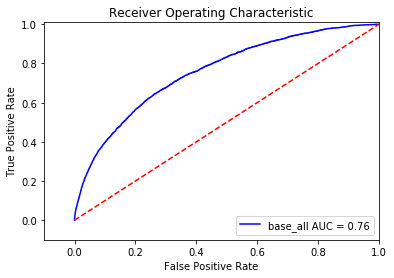

In [186]:
#全量用户预测
train_pred = alga.predict_proba(x_all_train)[:,1]
train_y=df_['target']
df_1['xffq_pred']=train_pred
print('全量用户AUC:%s' % (metrics.roc_auc_score(y_all_train, train_pred)))

df_1[['client_no','raise_time','cert_no']+feature_top+['target','xffq_pred']].to_csv('xffq_data_all_base_pred_20190311.csv') #base全量用户预测表
import mould_new as md
from imp import reload
reload(mould_new)
a=md.plot_roc(8,train_pred,train_y,'base_all','blue')  #base全量数据AUC结果图


In [ ]:
################################## 芝麻用户模型预测分##############################

In [165]:
#2018-12-18日首逾用户测试数据
import pandas as pd
import numpy as np
df1=pd.read_csv('xffq_zhima_pre.csv')
print(len(df1[df1['target']==1]),len(df1[df1['target']==0]))
df_=df1.drop(['Unnamed: 0'], axis=1)
feature_top=['loan_req_counts_m3', 'searched_org_cnt', 'credit_score', 'huabeiamount', 'p2p_counts_d7', 'apply_score', 'yy_register_hour', 'contact_credit_card_count', 'final_score', 'dialed_peer_num_cnt_avg_item_6m_rate', 'microfinance_counts_m3', 'loan_req_counts_d7', 'daybreak_total_cnt_6m_rate', 'min_totalconsumeamount', 'suolun_record_phone_days', 'contacts_router_ratio', 'phone_used_time_count', 'avg_call_time_item_1m', 'havetradecount', 'dialed_peer_num_cnt_item_1m_rate', 'yy_in_call_rate10', 'age', 'sms_day_avg_item_6m', 'suolun_blacklist_routers_pct', 'no_dial_day_avg_item_6m']
x_train1,y_train1=df_[feature_top],df_.loc[:,'target']  

423 14358


In [166]:
#芝麻用户预测
train_pred = alga.predict_proba(x_train1)[:,1]
df_['xffq_pred']=train_pred
#df_.to_csv('xffq_pred.csv')


ValueError: feature_names mismatch: ['M_LOAN_REQ_COUNTS_M3', 'M_SEARCHED_ORG_CNT', 'M_YOUMENG_CREDIT_SCORE', 'M_ECOMMERCE_HUABEI_AMOUNT', 'M_TD_P2P_COUNTS_D7', 'M_APPLY_SCORE', 'M_YY_REGISTER_HOUR', 'M_CONTACT_CREDIT_CARD_COUNT', 'M_FINAL_SCORE', 'M_MOXIE_DIALED_PEER_NUM_CNT_AVG_ITEM_6M_RATE', 'M_TD_MICROFINANCE_COUNTS_M3', 'M_LOAN_REQ_COUNTS_D7', 'M_DAYBREAK_TOTAL_CNT_6M_RATE', 'M_MIN_TOTALCONSUMEAMOUNT', 'M_SUOLUN_RECORD_PHONE_DAYS', 'M_CONTACTS_ROUTER_RATIO', 'M_CELL_USE_TIME', 'M_MOXIE_AVG_CALL_TIME_ITEM_1M', 'M_HAVETRADECOUNT', 'M_DIALED_PEER_NUM_CNT_ITEM_1M_RATE', 'M_YY_IN_CALL_RATE10', 'M_AGE', 'M_SMS_DAY_AVG_ITEM_6M', 'M_SUOLUN_BLACKLIST_ROUTERS_PCT', 'M_NO_DIAL_DAY_AVG_ITEM_6M'] ['loan_req_counts_m3', 'searched_org_cnt', 'credit_score', 'huabeiamount', 'p2p_counts_d7', 'apply_score', 'yy_register_hour', 'contact_credit_card_count', 'final_score', 'dialed_peer_num_cnt_avg_item_6m_rate', 'microfinance_counts_m3', 'loan_req_counts_d7', 'daybreak_total_cnt_6m_rate', 'min_totalconsumeamount', 'suolun_record_phone_days', 'contacts_router_ratio', 'phone_used_time_count', 'avg_call_time_item_1m', 'havetradecount', 'dialed_peer_num_cnt_item_1m_rate', 'yy_in_call_rate10', 'age', 'sms_day_avg_item_6m', 'suolun_blacklist_routers_pct', 'no_dial_day_avg_item_6m']
expected M_YY_IN_CALL_RATE10, M_SUOLUN_RECORD_PHONE_DAYS, M_HAVETRADECOUNT, M_AGE, M_MIN_TOTALCONSUMEAMOUNT, M_SEARCHED_ORG_CNT, M_APPLY_SCORE, M_MOXIE_DIALED_PEER_NUM_CNT_AVG_ITEM_6M_RATE, M_TD_P2P_COUNTS_D7, M_YOUMENG_CREDIT_SCORE, M_YY_REGISTER_HOUR, M_NO_DIAL_DAY_AVG_ITEM_6M, M_DIALED_PEER_NUM_CNT_ITEM_1M_RATE, M_LOAN_REQ_COUNTS_M3, M_TD_MICROFINANCE_COUNTS_M3, M_CONTACTS_ROUTER_RATIO, M_CELL_USE_TIME, M_DAYBREAK_TOTAL_CNT_6M_RATE, M_CONTACT_CREDIT_CARD_COUNT, M_MOXIE_AVG_CALL_TIME_ITEM_1M, M_ECOMMERCE_HUABEI_AMOUNT, M_SMS_DAY_AVG_ITEM_6M, M_SUOLUN_BLACKLIST_ROUTERS_PCT, M_LOAN_REQ_COUNTS_D7, M_FINAL_SCORE in input data
training data did not have the following fields: suolun_blacklist_routers_pct, yy_register_hour, havetradecount, suolun_record_phone_days, huabeiamount, microfinance_counts_m3, yy_in_call_rate10, min_totalconsumeamount, no_dial_day_avg_item_6m, p2p_counts_d7, avg_call_time_item_1m, searched_org_cnt, daybreak_total_cnt_6m_rate, apply_score, dialed_peer_num_cnt_avg_item_6m_rate, dialed_peer_num_cnt_item_1m_rate, loan_req_counts_m3, phone_used_time_count, final_score, sms_day_avg_item_6m, credit_score, contacts_router_ratio, age, contact_credit_card_count, loan_req_counts_d7

In [24]:
df_sample=pd.read_csv('xffq_offset_data.csv')
df_a=df_sample[['client_no','loan_cnt_30d_rate',
 'loan_cnt_15d_rate',
 'zhima_score',
 'cash_loan_15d',
 'zccreditscore',
 'cash_loan_30d',
 'tencent_fraud_risk_score',
 'loan_cnt_15d',
 'loan_cnt_90d_rate',
 'loan_cnt_30d',
 'consumstage_180d',
 'level',
 'loan_cnt_180d',
 'consumstage_30d',
 'consumstage_15d',
 'consumstage_90d',
 'cash_loan_90d',
 'org_count']]
xffq_offset_data=df_a.merge(df_,how='left',on='client_no')
#xffq_offset_data.to_csv('xffq_offset_data_final_comppare.csv')  #offset 数剧集：包含iv值前18个阿福与 前25个重要特征

In [139]:
print(len(xffq_offset_data[xffq_offset_data['target']==1]),len(xffq_offset_data[xffq_offset_data['target']==0]))

370 13092


In [ ]:
###########offset模型 -- start##############

In [ ]:
#xgboost——offset方法  不需要处理空缺值

In [167]:
data=xffq_offset_data[feature_top+['zhima_score','tencent_fraud_risk_score','xffq_pred']]
label=xffq_offset_data['target']
train_x, test_x, train_y, test_y = train_test_split(data, label, test_size=0.4, random_state=10)

In [168]:
import xgboost as xgb
dtrain=xgb.DMatrix(train_x,label=train_y, feature_names=feature_top+['zhima_score','tencent_fraud_risk_score','xffq_pred'])  #特征名称
xgb.DMatrix.set_base_margin(dtrain,margin=train_x['xffq_pred']) 
dtest=xgb.DMatrix(test_x,feature_names=feature_top+['zhima_score','tencent_fraud_risk_score','xffq_pred'])
xgb.DMatrix.set_base_margin(dtest,margin=test_x['xffq_pred'])

In [169]:
params={'booster':'gbtree',  #两种迭代模型 ：gbtree：基于树的模型 + gbliner：线性模型
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth':3,
    'min_child_weight':25,  # 叶子节点最小权重 ,参数默认为1
    'lambda':10,
    'subsample':0.75,  #随机选择80%样本建立决策树 
    'colsample_bytree':0.75,  #随机选择80%特征建立决策树
    'eta': 0.025,  #和xGB中的 learning rate 参数类似。通过减少每一步的权重，可以提高模型的鲁棒性,典型值为0.01-0.2
    'seed':0,   #随机种子
    'nthread':8,  #这个参数用来进行多线程控制，应当输入系统的核数
     'silent':1 #当这个参数值为1时，静默模式开启，不会输出任何信息。一般这个参数就保持默认的0，因为这样能帮我们更好地理解模型
       }   


In [170]:
watchlist = [(dtrain,'train')]
bst=xgb.train(params,dtrain,num_boost_round=5,evals=watchlist)
ypred=bst.predict(dtest)  #数组形式


[0]	train-auc:0.727193
[1]	train-auc:0.727194
[2]	train-auc:0.727194
[3]	train-auc:0.727194
[4]	train-auc:0.727194


test(auc):0.7573762694244621,train(auc):0.7271935517227854


<Figure size 864x432 with 0 Axes>

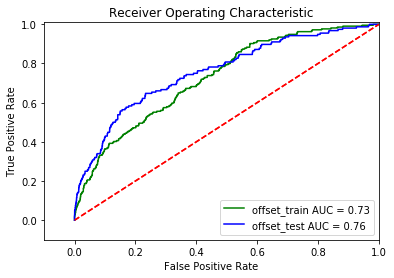

<Figure size 864x432 with 0 Axes>

In [171]:
# offset 训练集与测试集结果比较
test_pred = bst.predict(dtest)   #bst的predict预测的是概率，不是分类
train_pred = bst.predict(dtrain)
#all_pred = alga.predict_proba(x)[:,1]     
print('test(auc):%s,train(auc):%s' % (metrics.roc_auc_score(test_y, test_pred),    #auc通过对每个概率做的曲线，做两个AUC值：训练集+测试集，AUC值0.7以上表示较好拟合，如果训练集与练习集差的较多，很有可能
                                      metrics.roc_auc_score(train_y, train_pred)))   #过拟合，如果均不高，则为欠拟合。

#%%  输出offset模型AUC结果图
import mould_new as md
from imp import reload
reload(mould_new)
a=md.plot_roc(8,train_pred,train_y,'offset_train','green')
a=md.plot_roc(8,test_pred,test_y,'offset_test','blue')

In [ ]:
###########offset模型 -- end--##############

In [ ]:
# offset模型 预测 与 结果图
data=xffq_offset_data[feature_top+['zhima_score','tencent_fraud_risk_score']]
label=xffq_offset_data['target']  
train_x, test_x, train_y, test_y = train_test_split(data, label, random_state=0)
import xgboost as xgb
dtrain=xgb.DMatrix(train_x,label=train_y, feature_names=['a','b','c','d','e'])
#设置offset变量
xgb.DMatrix.set_base_margin(dtrain,margin=train_x[:,4])
dtest=xgb.DMatrix(test_x,feature_names=['a','b','c','d','e'])
#设置offset变量
xgb.DMatrix.set_base_margin(dtest,margin=test_x[:,4])
params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth':4,
    'lambda':10,
    'subsample':0.75,
    'colsample_bytree':0.75,
    'min_child_weight':2,
    'eta': 0.025,
    'seed':0,
    'nthread':8,
     'silent':1}

watchlist = [(dtrain,'train')]
bst=xgb.train(params,dtrain,num_boost_round=5,evals=watchlist)

# offset 训练集与测试集结果比较
test_pred = bst.predict(dtest)   #bst的predict预测的是概率，不是分类
train_pred = bst.predict(dtrain)
#all_pred = alga.predict_proba(x)[:,1]     
print('test(auc):%s,train(auc):%s' % (metrics.roc_auc_score(test_y, test_pred),    #auc通过对每个概率做的曲线，做两个AUC值：训练集+测试集，AUC值0.7以上表示较好拟合，如果训练集与练习集差的较多，很有可能
                                      metrics.roc_auc_score(train_y, train_pred)))   #过拟合，如果均不高，则为欠拟合。

#%%  输出offset模型AUC结果图
import mould_new as md
from imp import reload
reload(mould_new)
a=md.plot_roc(8,train_pred,train_y,'offset_train','green')
a=md.plot_roc(8,test_pred,test_y,'offset_test','blue')

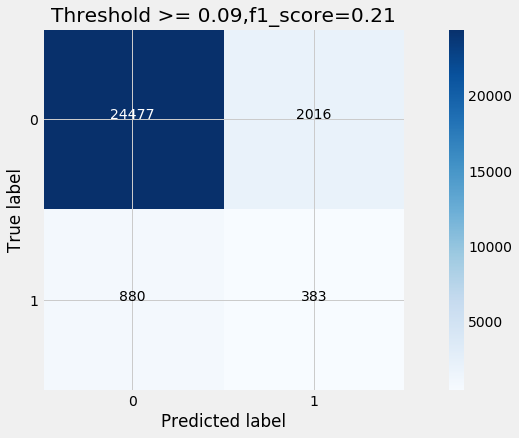

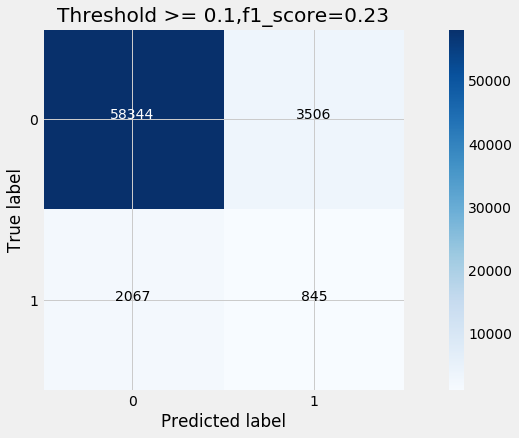

<Figure size 864x432 with 0 Axes>

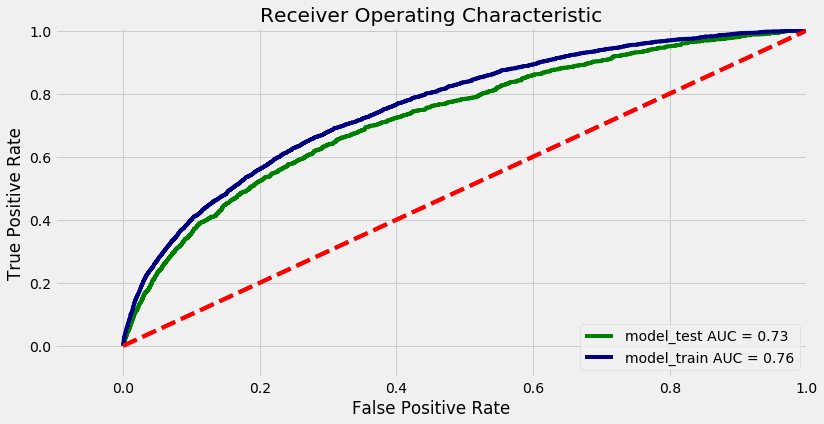

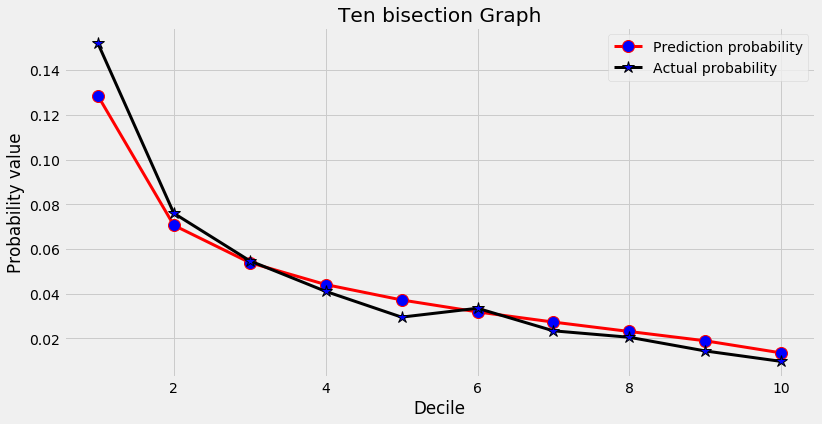

<Figure size 864x432 with 0 Axes>

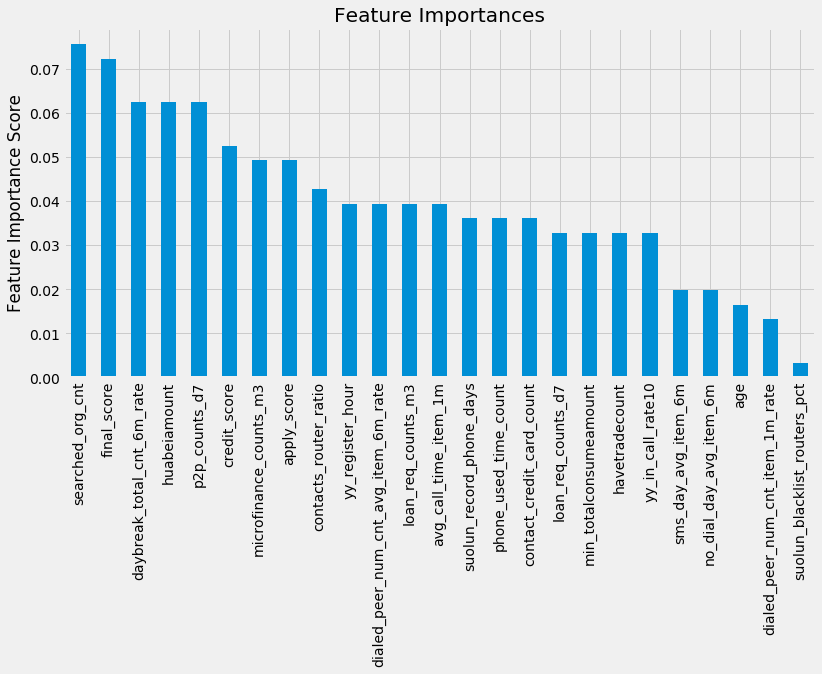

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

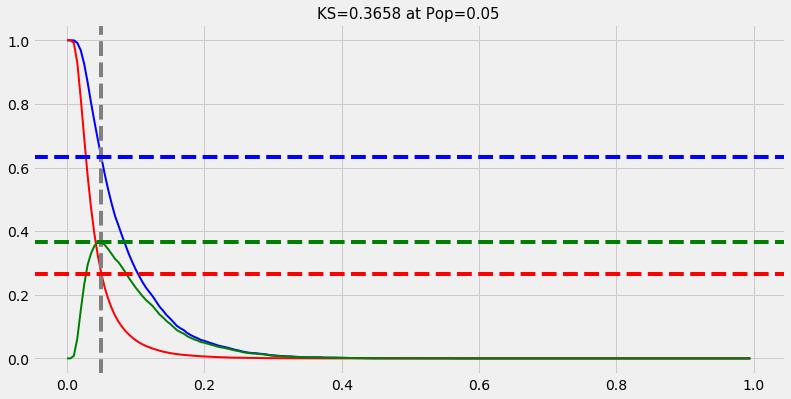

<Figure size 864x432 with 0 Axes>

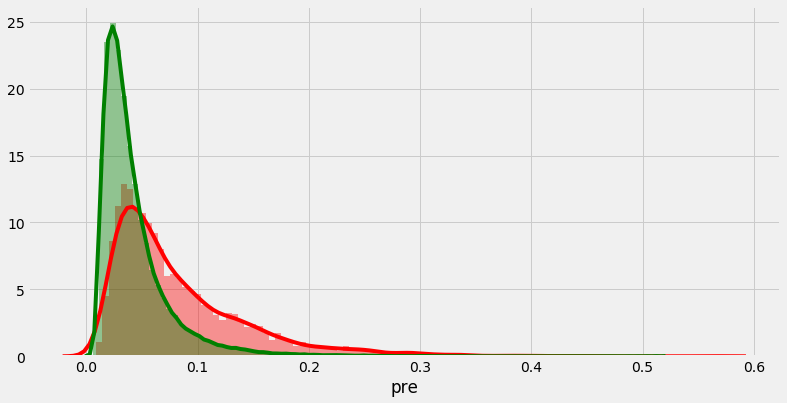

In [313]:
#%%  输出模型结果图
import mould_new
from imp import reload
reload(mould_new)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)
x=pd.concat([x_train,x_test])
y=pd.concat([y_train,y_test])
y_pred_test_1,y_pred_all_1,featimp_1=mould_new.model_result(alga,XGBClassifier,x_train,x_test,y_train,y_test,x,y,0) 

test(auc):0.7267505102036395,train(auc):0.7599876712313556


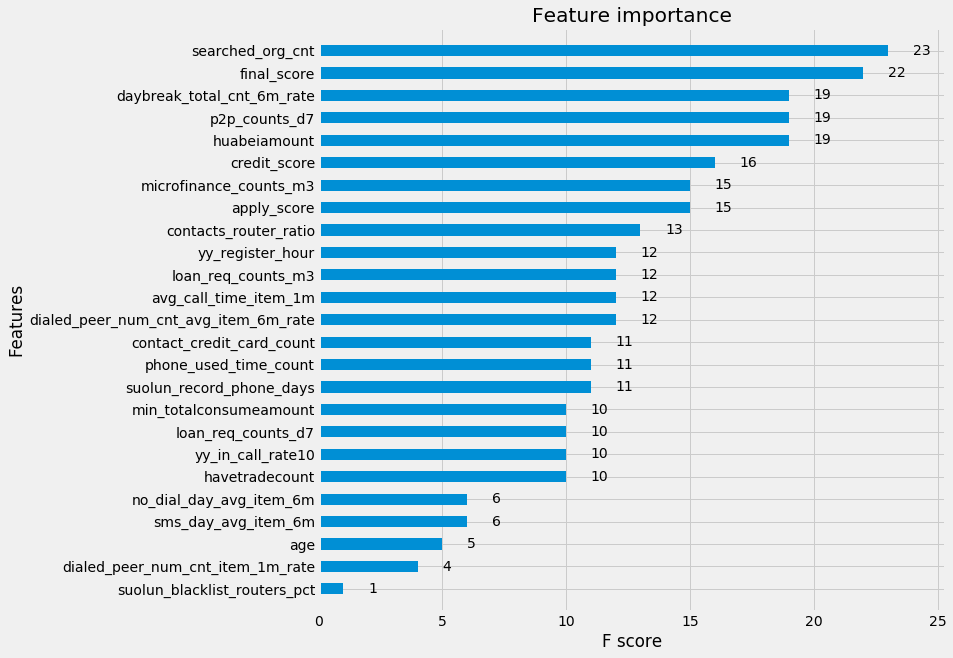

In [312]:
# 训练集与测试集结果比较
test_pred = alga.predict_proba(x_test)[:,1]   #注意predict与predict_proba区别： predict预测出来是类别，predict_proba预测的是概率，包括正反两个概率，取第二个
train_pred = alga.predict_proba(x_train)[:,1]
#all_pred = alga.predict_proba(x)[:,1]     
print('test(auc):%s,train(auc):%s' % (metrics.roc_auc_score(y_test, test_pred),    #auc通过对每个概率做的曲线，做两个AUC值：训练集+测试集，AUC值0.7以上表示较好拟合，如果训练集与练习集差的较多，很有可能
                                      metrics.roc_auc_score(y_train, train_pred)))   #过拟合，如果均不高，则为欠拟合。

 #特征重要性排序
fix,ax=plt.subplots(figsize=(10,10))
plot_importance(alga,
              height=0.5,
              ax=ax,
              max_num_features=64)
plt.show()

In [314]:
################################特征筛选部分####################################

In [331]:
col_name=df_.columns[0:25]  #数据集特征变量


In [332]:
#取前50个：
fea_importance=alga.feature_importances_
#print(len(fea_importance),len(col_name))
feature=col_name.copy()
fea_import=[]
for i in zip(feature,fea_importance):
    fea_import.append(i)
fea_import_dict=dict(fea_import)
#print(fea_import_dict)
feature_sort=sorted(fea_import_dict.items(),key=lambda item:item[1],reverse=True)[:50]
feature_top2=[]
for i in feature_sort:
    feature_top2.append(i[0])
print(feature_top2)

['loan_req_counts_d7', 'dialed_peer_num_cnt_item_1m_rate', 'p2p_counts_d7', 'final_score', 'daybreak_total_cnt_6m_rate', 'contacts_router_ratio', 'searched_org_cnt', 'avg_call_time_item_1m', 'client_no', 'huabeiamount', 'yy_register_hour', 'dialed_peer_num_cnt_avg_item_6m_rate', 'min_totalconsumeamount', 'loan_req_counts_m3', 'credit_score', 'apply_score', 'contact_credit_card_count', 'microfinance_counts_m3', 'suolun_record_phone_days', 'phone_used_time_count', 'havetradecount', 'yy_in_call_rate10', 'age', 'sms_day_avg_item_6m', 'suolun_blacklist_routers_pct']


In [135]:
feature_top_1=feature_top2.copy()

In [85]:
feature_top_2=feature_top2.copy()

In [91]:
feature_top_3=feature_top2.copy()

In [51]:
feature_top_4=feature_top2.copy()

In [59]:
feature_top_5=feature_top2.copy()

In [66]:
feature_top_6=feature_top2.copy()

In [94]:
#特征融合：
feature_top=feature_top_1.copy()
for k in [feature_top_2,feature_top_3]:
    for i in k: 
        if i not in feature_top:
            feature_top.append(i)
    print(len(feature_top))
print(feature_top)    
feature_top_b=feature_top.copy()    

66
72
['searched_org_cnt', 'loan_req_counts_d7', 'yy_register_hour', 'huabeiamount', 'credit_score', 'contact_credit_card_count', 'loan_req_counts_m3', 'microfinance_counts_m3', 'avg_call_time_item_1m', 'suolun_record_phone_days', 'phone_used_time_count', 'yy_linker_num', 'suolun_age', 'contacts_router_ratio', 'final_score', 'dialed_peer_num_cnt_item_1m_rate', 'apply_score', 'p2p_counts_d7', 'havetradecount', 'min_totalconsumeamount', 'daybreak_total_cnt_6m_rate', 'dialed_peer_num_cnt_avg_item_6m_rate', 'yy_in_call_rate10', 'yy_in_call_rate30', 'sms_day_avg_item_6m', 'morning_total_time_6m_rate', 'history_suc_fee_rate', 'peer_loc_cnt_item_1m', 'no_dial_day_avg_item_6m', 'suolun_blacklist_routers_pct', 'phone_gray_score', 'city_freq', 'idcard_with_other_phones', 'forenoon_total_cnt_3m_rate', 'midnight_total_cnt_3m_rate', 'province_freq', 'suolun_record_idcard_days', 'register_org_cnt', 'apply_city_level', 'dialed_peer_num_cnt_avg_item_3m_rate', 'contact_night_rate', 'dusk_total_cnt_6m_r

In [4]:
#feature_top_a=feature_top.copy()
feature_top_b=['searched_org_cnt', 'loan_req_counts_d7', 'yy_register_hour', 'huabeiamount', 'credit_score', 'contact_credit_card_count', 'loan_req_counts_m3', 'microfinance_counts_m3', 'avg_call_time_item_1m', 'suolun_record_phone_days', 'phone_used_time_count', 'yy_linker_num', 'suolun_age', 'contacts_router_ratio', 'final_score', 'dialed_peer_num_cnt_item_1m_rate', 'apply_score', 'p2p_counts_d7', 'havetradecount', 'min_totalconsumeamount', 'daybreak_total_cnt_6m_rate', 'dialed_peer_num_cnt_avg_item_6m_rate', 'yy_in_call_rate10', 'yy_in_call_rate30', 'sms_day_avg_item_6m', 'morning_total_time_6m_rate', 'history_suc_fee_rate', 'peer_loc_cnt_item_1m', 'no_dial_day_avg_item_6m', 'suolun_blacklist_routers_pct', 'phone_gray_score', 'city_freq', 'idcard_with_other_phones', 'forenoon_total_cnt_3m_rate', 'midnight_total_cnt_3m_rate', 'province_freq', 'suolun_record_idcard_days', 'register_org_cnt', 'apply_city_level', 'dialed_peer_num_cnt_avg_item_3m_rate', 'contact_night_rate', 'dusk_total_cnt_6m_rate', 'query_finance_count_rate', 'apply_latest_three_month_rate', 'g_consumer_finance_counts_m1', 'power_off_day_avg_item_6m', 'behavior_latest_three_month', 'max_single_recharge_item_6m_rate', 'apply_latest_one_month_rate', 'bank_consumer_finance_counts_m6', 'level', 'onlineshoppingamount_ratio', 'behavior_history_suc_fee', 'evening_total_time_6m_rate', 'loan_req_counts_m6', 'behavior_latest_six_month', 'contact_bank_count', 'sum_amount_count', 'tradecount_ratio', 'daybreak_total_cnt_3m_rate', 'creditlevelasbuyer', 'l_consumer_finance_counts_m60', 'bank_consumer_finance_counts_m12', 'avg_call_time_item_3m', 'call_day_avg_item_6m', 'noon_total_time_3m_rate', 'daybreak_total_time_6m_rate', 'suolun_score', 'yy_call_reocode_matched_emergency_contact', 'suolun_org_cnt_recent_d14', 'behavior_loans_credibility', 'maxconsumeamount_ratio'] 

In [ ]:
#########################################end##############################################

In [ ]:
##########################################输出模型结果图#######################################

In [316]:
featimp_1


searched_org_cnt                        0.075658
final_score                             0.072368
daybreak_total_cnt_6m_rate              0.062500
huabeiamount                            0.062500
p2p_counts_d7                           0.062500
credit_score                            0.052632
microfinance_counts_m3                  0.049342
apply_score                             0.049342
contacts_router_ratio                   0.042763
yy_register_hour                        0.039474
dialed_peer_num_cnt_avg_item_6m_rate    0.039474
loan_req_counts_m3                      0.039474
avg_call_time_item_1m                   0.039474
suolun_record_phone_days                0.036184
phone_used_time_count                   0.036184
contact_credit_card_count               0.036184
loan_req_counts_d7                      0.032895
min_totalconsumeamount                  0.032895
havetradecount                          0.032895
yy_in_call_rate10                       0.032895
sms_day_avg_item_6m 

In [ ]:
############################end######################################